# Examen Final - Proyecto en Ciencia de Datos

## 1) EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

In [2]:
data = pd.read_csv("/Users/rosaura/Downloads/Projects_cleansed.csv")
data.head(10)

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded
5,It's about Time... Time for Kids!,We know that success in school is directly rel...,"Literacy & Language, History & Civics",175.15,Fully Funded
6,Experiencing India,Travel and hands on experiences outside the cl...,Applied Learning,3020.59,Fully Funded
7,Come Read UPFRONT,"Current events, news, and non-fiction articles...",Literacy & Language,566.19,Expired
8,"Grammar, Grammar We Need You",Grammar can be tricky! My students face many c...,Literacy & Language,339.20,Fully Funded
9,Little Learners Love To Listen To Literature,Do you remember when your parents read bedtime...,Literacy & Language,566.73,Fully Funded


In [3]:
data.shape

(1109981, 5)

Tenemos 1,109,981 registros y 5 columnas.

In [4]:
data.isna().sum()

Project Title                    0
Project Short Description        0
Project Subject Category Tree    0
Project Cost                     0
Project Current Status           0
dtype: int64

No hay valores nulos en el dataset.

In [5]:
data.describe()

,Project Cost
count,1.109981e+06
mean,7.415194e+02
std,1.083264e+03
min,3.529000e+01
25%,3.351200e+02
50%,5.153500e+02
75%,8.675100e+02
max,2.557377e+05


La media del costo del proyecto es de 741.52 dólares, el mínimo es de 35 dólares, y el máximo es de 255,737 dólares

In [6]:
data["Project Current Status"].value_counts()

Fully Funded    826740
Expired         241390
Live             41851
Name: Project Current Status, dtype: int64

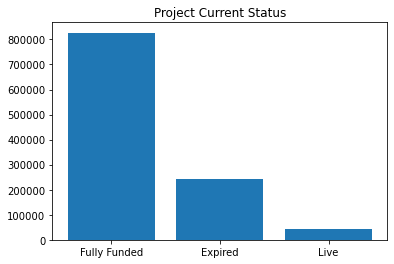

In [7]:
plt.bar(data["Project Current Status"].value_counts().index, data["Project Current Status"].value_counts().values)
plt.title("Project Current Status")
plt.show()

La categoría más frecuente es Fully Funded.

In [8]:
string = []
for i in data["Project Short Description"]:
    string.append(i)
string

['Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...',
 'Help us have a fun, interactive listening center in our class! Did you struggle to read when you were younger? Did it help to see the words and hear them read to you at the same time? This...',
 'Visiting or moving to a new place can be very exciting yet frightening at the same time especially if you are unfamiliar with the native language. Learning a second language is a difficult...',
 'Students at our school are still working hard to become proficient in English. A great series like The Sisters Grimm will help students improve reading comprehension by providing elements that...',
 '"Idle hands" were something that Issac Watts spoke of, but when students with special needs are left with idle hands, it can result in mischievous actions. Help us keep our hands busy with work!...',
 "We know t

In [9]:
data["Project Short Description"].loc[0]

'Did you know that 1-7 students in grades K-12 is either a bully or a victim of bullying? My goal is to raise prevention through being educated and aware of the effects and consequences of...'

In [10]:
# Cambiamos el estatus Fully Funded y Live a 1, y Expired a 0
data["Funded"] = data["Project Current Status"]
data["Funded"].replace({"Fully Funded":1, "Live":1, "Expired":0}, inplace=True)
data.head(10)

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status,Funded
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded,1
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired,0
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded,1
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded,1
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded,1
5,It's about Time... Time for Kids!,We know that success in school is directly rel...,"Literacy & Language, History & Civics",175.15,Fully Funded,1
6,Experiencing India,Travel and hands on experiences outside the cl...,Applied Learning,3020.59,Fully Funded,1
7,Come Read UPFRONT,"Current events, news, and non-fiction articles...",Literacy & Language,566.19,Expired,0
8,"Grammar, Grammar We Need You",Grammar can be tricky! My students face many c...,Literacy & Language,339.20,Fully Funded,1
9,Little Learners Love To Listen To Literature,Do you remember when your parents read bedtime...,Literacy & Language,566.73,Fully Funded,1


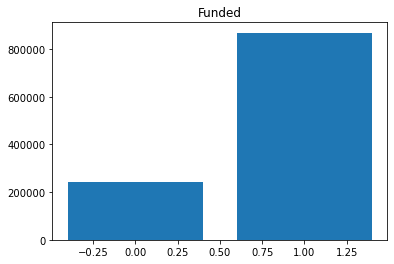

In [11]:
plt.bar(data["Funded"].value_counts().index, data["Funded"].value_counts().values)
plt.title("Funded")
plt.show()

## 2) Data Wrangling

In [12]:
# Nueva variable: Character Length
data['character_cnt'] = data['Project Short Description'].str.len()
data.head()

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status,Funded,character_cnt
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded,1,190
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired,0,191
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded,1,191
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded,1,195
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded,1,197


In [13]:
# Nueva variable: Word Count
data['word_counts'] = data['Project Short Description'].str.split().str.len()
data.head()

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status,Funded,character_cnt,word_counts
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded,1,190,35
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired,0,191,38
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded,1,191,33
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded,1,195,30
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded,1,197,34


In [14]:
# Nueva variable: Number Count
data['num'] = data['Project Short Description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data.head()

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status,Funded,character_cnt,word_counts,num
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded,1,190,35,0
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired,0,191,38,0
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded,1,191,33,0
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded,1,195,30,0
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded,1,197,34,0


In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
# Nueva variable: Cleaned Description
# Se eliminan los stopwords, se convierte todo a minúsculas y
data['processedtext'] = data['Project Short Description'].str.replace('[^\w\s]','')
data['processedtext'] = data['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data['processedtext'] = data['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

/var/folders/vy/11j1fpvs73d2q6m6tfbtxl4c0000gn/T/ipykernel_10973/3042260138.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['processedtext'] = data['Project Short Description'].str.replace('[^\w\s]','')


,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status,Funded,character_cnt,word_counts,num,processedtext
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded,1,190,35,0,did know 17 students grades k12 either bully v...
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired,0,191,38,0,help us fun interactive listening center class...
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded,1,191,33,0,visiting moving new place exciting yet frighte...
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded,1,195,30,0,students school still working hard become prof...
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded,1,197,34,0,idle hands something issac watts spoke student...


In [17]:
# Vectorización de la varible descripcion
tfidf = TfidfVectorizer(max_features=300, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
dat_tfIdf = tfidf.fit_transform(data['processedtext'])
dat_tfIdf

<1109981x300 sparse matrix of type '<class 'numpy.float64'>'
	with 9848345 stored elements in Compressed Sparse Row format>

## 3) Model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dat_tfIdf, data["Funded"], test_size=0.3)

Se usará un modelo de regresión logística ya que nuestra variable de respuesta es binaria.

In [19]:
# Modelo de regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train, Y_train)
score = model.score(X_test, Y_test)
score

0.7837174732353339

Guardamos el modelo entrenado usando pickle.

In [20]:
import pickle
pickle.dump(model, open("./model/funded_logmodel.sav", 'wb'))

In [21]:
loaded_model = pickle.load(open("./model/funded_logmodel.sav", 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7837174732353339


## 4) Prediction

In [22]:
text = "Our project is amazing compared to other projects because our team has the best people on Earth, you should definitely fund us"
text_tfidf = tfidf.transform([text]).toarray()

In [23]:
model.predict(text_tfidf)

array([1])